## Data Analysis - Daniela


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data1 = pd.read_csv('Mobile_App_Store_Data/appleStore.csv')
data2 = pd.read_csv('Mobile_App_Store_Data/appleStore_description.csv')

# merge data
data = pd.merge(data1, data2, how='outer', on=['id', 'id'])

# clean
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('track_name_y', axis=1)
data = data.drop('size_bytes_y', axis=1)

# show
data.head(3)


,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...


In [3]:
data.columns

Index(['id', 'track_name_x', 'size_bytes_x', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic',
       'app_desc'],
      dtype='object')

### What are the most common words used in description of the apps?

In [7]:
# creating list from description
description_list = list(data.app_desc)
# print(description_list[:100])

# auxiliary variables
words_list = []
words_dict = {}
unwanted = ["with", "their", "this", "which", "after"]

def create_list_of_words_in_description(description_list):
    """Splits the tdescription column from 
    dataset into list of words, removes unwanted characters"""
    
    for desc in description_list:
        if type(desc) == str:
            desc= desc.replace('\n', ' ')
            desc= desc.replace('•', ' ')

            words_in_desc = desc.split(" ")   
            for w in words_in_desc:
                w = ''.join(e for e in w if e.isalnum())
                w = w.lower()
                if len(w)>4:
                    if w not in unwanted:
                        words_list.append(w)
                
                continue

    return words_list


def count_words(words_list, words_dict):
    """Counts the words in motivation titles, 
    creates a dictionary"""
    for w in words_list:
        if w not in words_dict.keys():
            count = words_list.count(w)
            words_dict[w] = count
        else:
            continue

    return words_dict         


words_list = create_list_of_words_in_description(description_list)
words_dict = count_words(words_list, words_dict)

# showing result
desc_df = pd.DataFrame.from_dict(words_dict, orient="index")
desc_df.sort_values(by=[0], ascending=False).head(5)



,0
features,4214
games,3463
world,3327
friends,2943
iphone,2918


In [8]:
desc_df.sort_values(by=[0], ascending=False).head(15)


,0
features,4214
games,3463
world,3327
friends,2943
iphone,2918
other,2832
through,2624
about,2308
support,2080
create,2052


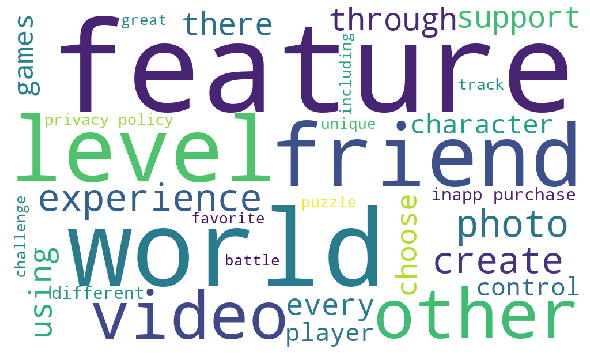

In [11]:
# create worldcloud image according of word counts
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

desc_string = ''
desc_string += " ".join(words_list)+" "

wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white',
                max_words=30,
                stopwords = unwanted, 
                min_font_size = 10).generate(desc_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show()